In [2]:
from IPython.display import Image

### Deep Learning y AI

La inteligencia artificial son modelos o algoritmos que son capaces de realizar tareas complejas, eventualmente de toma de decisiones como un humano.

El aprendizaje profundo (deep learning) son algoritmos basados en redes neuronales que son capaces de aprender con el tiempo, en general se llega a realizar tareas complejas con su ayuda.

Puntos negativos:
    
* Requiere gran cantidad de información para su entrenamiento.
* Son propensos al overfitting.

Puntos positivos:

* Se puede llegar a modelos de mayor eficiencia que cualquier modelo supervisado
* Mejora a través del tiempo

Los principales problemas a tratar son reconocimiento de imagenes y reconocimiento del lenguaje natural.

Rem: Si se tiene un modelo clásica de Machine Learning que funciona bien es mejor quedarse con dicho modelo ya que computacionalmente hablando será más eficiente

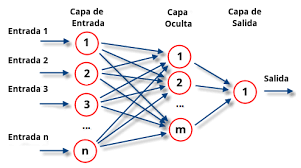

In [6]:
Image('RedNeuronal1.png',width=500)

Las bolitas rojas son llamadas neuronas (números del 0 al 1). Que se unen entre ellas mediante enlaces (flechitas azules) que no son otra cosa que números reales que son ligadas mediante una función (logistica, sigmoidal, discontinua u otras)

El peso de los enlaces son las incognitas de nuestro problema y que se optimizan mediante los ejemplos.

Por ejemplo si tenemos un modelo clasificador de imagenes de $20\times 20$ para 2 tipos de objetos con una capa oculta, tendríamos 6432 incognitas que hay que ir optimizando con los ejemplos. Es por eso que decimos que una red neuronal es bastante costosa computacionalmente hablando

En nuestro ejemplo tenemos $400$ neoronas de entrada (numeros entre 0 y 1), los llamaremos $a_i^{(0)}$, $i=1,...,400$

Para activar la primera neurona de la segunda capa necesitamos 

$$f(\omega_1^{(0)}a_1^{0}+...+\omega_{400}^{(0)}a_{400}^{(0)})=a_1^{(1)}$$

Si tenemos 16 neuronas en la segunda capa vamos a tener

$$f\left(\begin{bmatrix}\omega_{1,1}^{(0)}&\omega_{1,2}^{(0)}&...&\omega_{1,400}^{(0)}\\ \omega_{2,1}^{(0)}&\omega_{2,2}^{(0)}&...&\omega_{2,400}^{(0)}\\ \vdots & \vdots &...&\vdots \\ \omega_{16,1}^{(0)}&\omega_{16,2}^{(0)}&...&\omega_{16,400}^{(0)}\end{bmatrix}\begin{bmatrix}a_1^{(0)}\\a_2^{(0)}\\ \vdots \\ a_{400}^{(0)}\end{bmatrix}\right)=\begin{bmatrix}a_1^{(1)}\\ \vdots \\ a_{16}^{(1)}\end{bmatrix}$$

Para cada capa se utiliza una función de enlace y cada paso debe ser calculado por medio de algún método de optimización

Para evitar el ruido provisto por errores de medida para cada neurona podemos añadir un sesgo que nos permitirá tener cierto valor de tolerancia. a

$$f\left(\begin{bmatrix}\omega_{1,1}^{(0)}&\omega_{1,2}^{(0)}&...&\omega_{1,400}^{(0)}\\ \omega_{2,1}^{(0)}&\omega_{2,2}^{(0)}&...&\omega_{2,400}^{(0)}\\ \vdots & \vdots &...&\vdots \\ \omega_{16,1}^{(0)}&\omega_{16,2}^{(0)}&...&\omega_{16,400}^{(0)}\end{bmatrix}\begin{bmatrix}a_1^{(0)}\\a_2^{(0)}\\ \vdots \\ a_{400}^{(0)}\end{bmatrix}-\begin{bmatrix}b_1^{(0)}\\ b_2^{(0)}\\\vdots \\ b_{16}^{(0)}\end{bmatrix}\right)=\begin{bmatrix}a_1^{(1)}\\ \vdots \\ a_{16}^{(1)}\end{bmatrix}$$

Como se trata de un problema complejo el algoritmo de optimización será iterativo por lo que es conveniente que tenga suficientes iteraciones para encontrar buenas aproximaciones de los pesos pero no demasiadas para que el modelo entre en overfitting.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


In [8]:
mnist=tf.keras.datasets.mnist

In [16]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [17]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

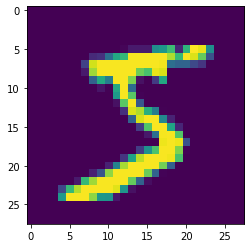

In [18]:
plt.imshow(x_train[0])
plt.show()

In [19]:
y_train[0]

5

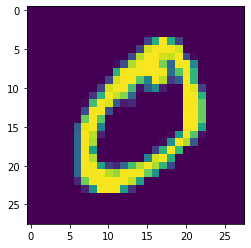

In [20]:
plt.imshow(x_train[1])
plt.show()

In [21]:
y_train[1]

0

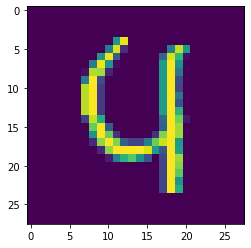

In [22]:
plt.imshow(x_train[15556])
plt.show()

In [23]:
y_train[15556]

4

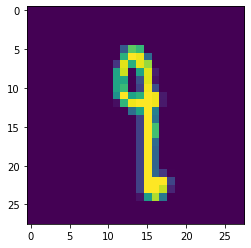

In [24]:
plt.imshow(x_test[4500])
plt.show()

In [25]:
y_test[4500]

9

In [26]:
x_train=tf.keras.utils.normalize(x_train,axis=1)

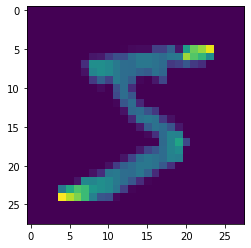

In [28]:
plt.imshow(x_train[0])
plt.show()

In [29]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [37]:
modelo=tf.keras.models.Sequential()

In [38]:
modelo.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [39]:
modelo.add(tf.keras.layers.Dense(32,activation='relu'))

In [40]:
modelo.add(tf.keras.layers.Dense(10,activation='softmax'))

In [41]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [42]:
modelo.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4177 - accuracy: 0.8880
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2175 - accuracy: 0.9367
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1724 - accuracy: 0.9497
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1453 - accuracy: 0.9573
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1266 - accuracy: 0.9622: 0s - loss: 0.127 - ETA: 0s - loss: 0.1272 - accu


In [44]:
modelo.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.9582


[0.14177343249320984, 0.9581999778747559]

In [50]:
imagen=cv2.imread('3.png')[:,:,0]

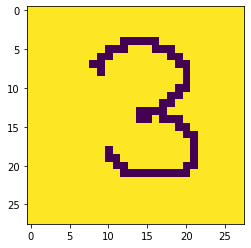

In [51]:
plt.imshow(imagen)

In [52]:
imagen

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,
        255, 255, 255,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [53]:
imagen=np.invert(np.array([imagen]))
imagen

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         255,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
           0,   0,   0

In [54]:
imagen=tf.keras.utils.normalize(imagen,axis=1)
imagen

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [57]:
prediccion=modelo.predict(imagen)
prediccion

array([[2.0108857e-04, 1.2484890e-03, 5.5373192e-01, 3.5558921e-01,
        2.2007518e-04, 1.0812725e-02, 2.2905180e-03, 7.4411253e-04,
        7.5041920e-02, 1.1994728e-04]], dtype=float32)

In [59]:
np.argmax(prediccion)+1

3

In [60]:
modelo.predict(x_train[0])

ValueError: in user code:

    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\erwin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 28]


In [62]:
imagen.shape

(1, 28, 28)

In [63]:
x_train[0].shape

(28, 28)

In [66]:
imagen2=np.array([x_train[0]])

In [67]:
imagen2.shape

(1, 28, 28)

In [71]:
np.argmax(modelo.predict(imagen2))

5

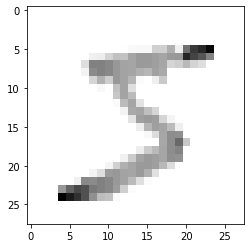

In [77]:
plt.imshow(imagen2[0,:,:],cmap=plt.cm.binary)
plt.show()

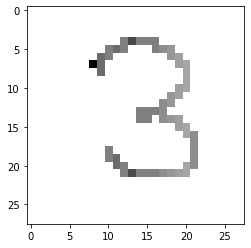

In [78]:
plt.imshow(imagen[0,:,:],cmap=plt.cm.binary)
plt.show()

In [81]:
imagen3=cv2.imread('7.png')[:,:,0]

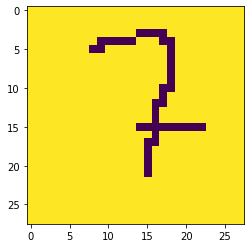

In [82]:
plt.imshow(imagen3)

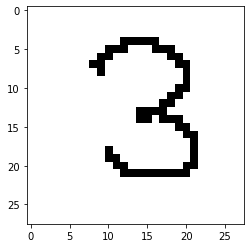

In [91]:
imagen=cv2.imread('3.png')[:,:,0]
imagen=np.invert(np.array([imagen]))
#imagen3=tf.keras.utils.normalize(imagen3,axis=1)
plt.imshow(imagen[0,:,:],cmap=plt.cm.binary)
plt.show()

In [92]:
np.argmax(modelo.predict(imagen))

3

In [95]:
np.argmax(modelo.predict(imagen2))

5

In [96]:
modelo2=tf.keras.models.Sequential()
modelo2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
modelo2.add(tf.keras.layers.Dense(128,activation='relu'))
modelo2.add(tf.keras.layers.Dense(10,activation='softmax'))
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3204 - accuracy: 0.9097
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1467 - accuracy: 0.9571: 1s - loss: 0.1517 -  - E
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002 - accuracy: 0.9705
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0576 - accuracy: 0.9829


In [97]:
modelo2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9733


[0.0859869047999382, 0.9732999801635742]

In [99]:
np.argmax(modelo2.predict(imagen))

2

In [100]:
np.argmax(modelo2.predict(imagen2))

5

In [101]:
np.argmax(modelo2.predict(imagen3))

2

In [102]:
modelo3=tf.keras.models.Sequential()
modelo3.add(tf.keras.layers.Flatten(input_shape=(28,28)))
modelo3.add(tf.keras.layers.Dense(64,activation='relu'))
modelo3.add(tf.keras.layers.Dense(64,activation='relu'))
modelo3.add(tf.keras.layers.Dense(10,activation='softmax'))
modelo3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo3.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3165 - accuracy: 0.9089
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9567: 3s - los
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1013 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9797


In [103]:
modelo3.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9714


[0.09247616678476334, 0.9714000225067139]

In [105]:
np.argmax(modelo3.predict(imagen))

3

In [106]:
np.argmax(modelo3.predict(imagen2))

5

In [107]:
np.argmax(modelo3.predict(imagen3))

3

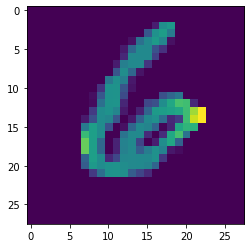

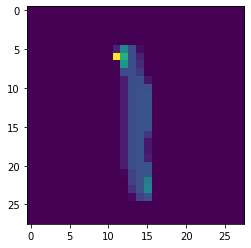

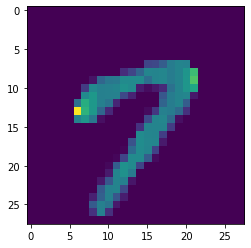

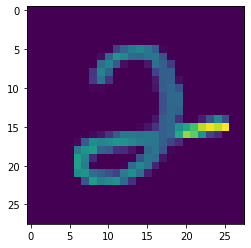

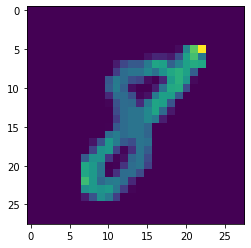

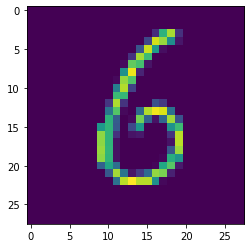

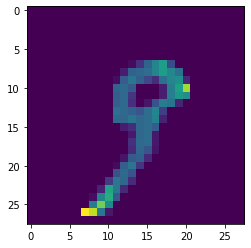

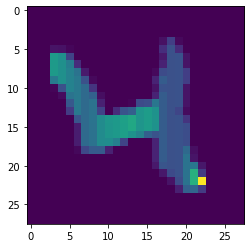

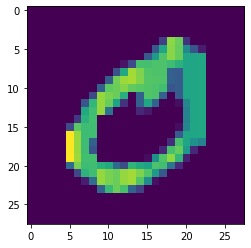

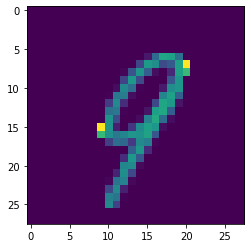

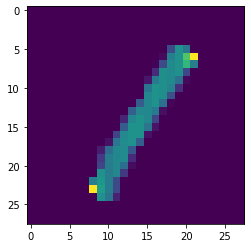

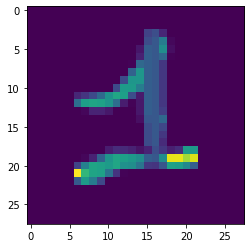

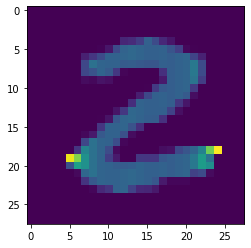

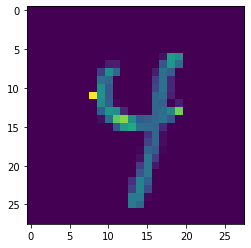

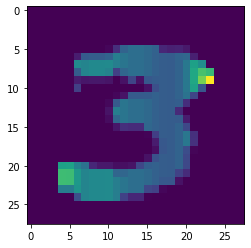

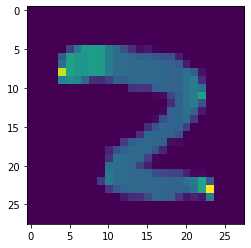

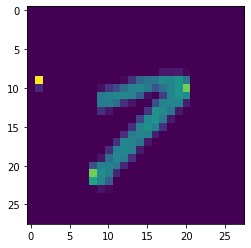

In [121]:
for i in range(13,30):
    plt.imshow(x_train[i])
    plt.show()

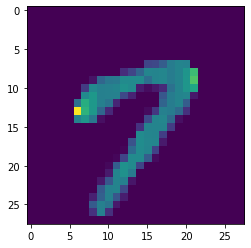

In [122]:
plt.imshow(x_train[15])
plt.show()

In [123]:
y_train[15]

7

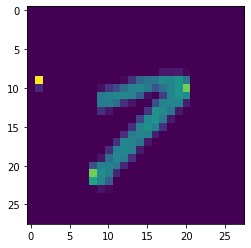

In [124]:
plt.imshow(x_train[29])
plt.show()

In [125]:
y_train[29]

7